The goal of this homework is to create a regression model for predicting the prices (column 'Final Price').

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

# Preparing the dataset

In [3]:
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
df = df[['ram', 'storage', 'screen', 'final_price']]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


# EDA

<u>**Final price**</u>
- Final price has a long tail distribution
- It is right skewed with a long right tail

<Axes: xlabel='final_price', ylabel='Count'>

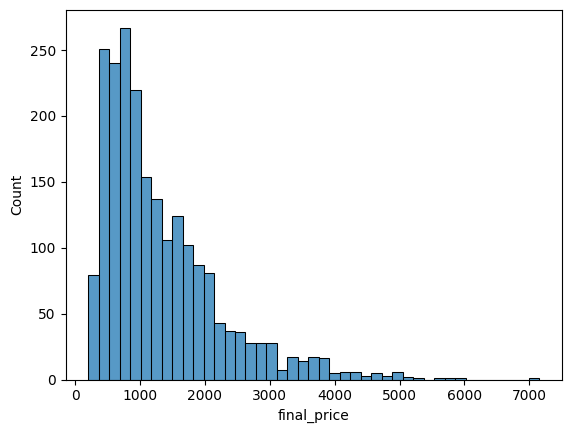

In [6]:
sns.histplot(df.final_price)

<Axes: xlabel='final_price', ylabel='Density'>

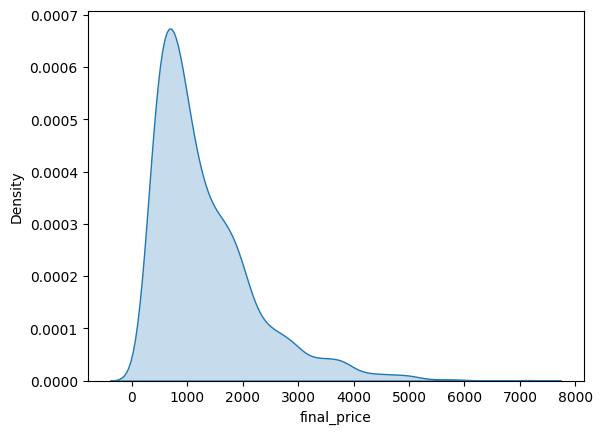

In [7]:
sns.kdeplot(df.final_price, fill=True)

<Axes: xlabel='final_price', ylabel='Density'>

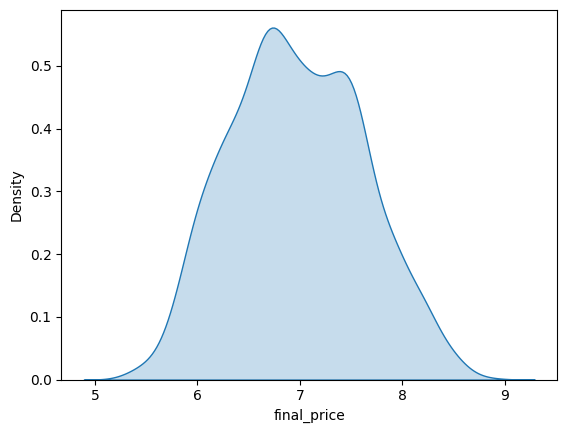

In [8]:
final_price_log = np.log1p(df.final_price)

sns.kdeplot(final_price_log, fill=True)

In [9]:
print(f"Mean: {df.final_price.mean()}\nMedian: {df.final_price.median()}\nMode: {df.final_price.mode().values[0]}")


Mean: 1312.638509259259
Median: 1031.9450000000002
Mode: 999.0


In [10]:
print(f"Skewness is: {round(df.final_price.skew(), 1)} - highly skewed (positive)")

Skewness is: 1.6 - highly skewed (positive)


# Question 1
There's one column with missing values. What is it?

In [11]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

# Question 2
What's the median (50% percentile) for variable 'ram'?

In [12]:
df['ram'].median()

np.float64(16.0)

In [13]:
df['ram'].describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

# Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [14]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

n_val, n_test, n_train

(432, 432, 1296)

In [15]:
# add randomness to data split
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

In [16]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

# Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

**Options:**
- With 0
- With mean
- Both are equally good

In [17]:
# we don't need the index so we can drop it, was randomly shuffled
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
# get target variable/label/dependent variable
# y_train = np.log1p(df_train['final_price']).values
# y_val = np.log1p(df_val['final_price']).values
# y_test = np.log1p(df_test['final_price']).values

y_train = df_train['final_price'].values
y_val = df_val['final_price'].values
y_test = df_test['final_price'].values

In [19]:
# delete to avoid using it as a feature by mistake - to avoid data leakage and overfitting
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [20]:
df_train.shape, df_val.shape, df_test.shape

((1296, 3), (432, 3), (432, 3))

In [21]:
df_train.head(2)

,ram,storage,screen
0,32,1000,15.6
1,4,64,14.1


In [22]:
df_train.isnull().sum() 

ram        0
storage    0
screen     3
dtype: int64

## Prepare X

In [23]:
training_mean_screen = df_train.screen.mean()
training_mean_screen

np.float64(15.163534416086618)

In [24]:
def prepare_X(df, fill_with_zeros=True):
    df = df.copy() 

    if fill_with_zeros:
        X = df.fillna(0).values
    else:
        X = df.fillna(training_mean_screen).values
    
    return X

## Train linear regression model

In [25]:
def train_linear_regression(X, y):
    # add bias/baseline term to the features matrix
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) # Gram matrix
    XTX_inv = np.linalg.inv(XTX)

    XTX.dot(XTX_inv).round(1) # Should be an identity matrix

    w_full = XTX_inv.dot(X.T).dot(y) # linear regression normal equation
    return w_full[0], w_full[1:]

## RMSE

In [26]:
def rmse(y, y_pred, round_rmse=True):
    error = y - y_pred
    se = (error ** 2)
    mse = se.mean()
    if round_rmse:
        return round(np.sqrt(mse), 2)
    else:
        return np.sqrt(mse)

## Fill missing values with 0

In [27]:
X_train = prepare_X(df_train, fill_with_zeros=True)

w0, w = train_linear_regression(X_train, y_train)
w0, w # we can use the weights to make predictions

(np.float64(676.8954853003963),
 array([ 43.70681555,   0.86506867, -36.10399833]))

In [28]:
y_pred = w0 + X_train.dot(w)
y_pred

array([2377.35987681,  398.02076576, 2435.12627415, ..., 1255.89731808,
       1313.66371541, 1313.66371541])

In [29]:
rmse(y_train, y_pred)

np.float64(602.39)

In [30]:
X_val = prepare_X(df_val)

# use the trained weights to make predictions
y_pred = w0 + X_val.dot(w) 
rmse(y_val, y_pred)

np.float64(597.36)

In [31]:
rmse(y_val, y_pred, round_rmse=False)

np.float64(597.3635593619621)

## Fill missing values with training mean

In [32]:
X_train = prepare_X(df_train, fill_with_zeros=False)

w0, w = train_linear_regression(X_train, y_train)
w0, w # we can use the weights to make predictions

(np.float64(808.9159907333188),
 array([ 43.90774584,   0.87135236, -45.18273312]))

In [33]:
y_pred = w0 + X_train.dot(w)
y_pred

array([2380.46558232,  403.23698821, 2452.75795532, ..., 1252.72169651,
       1325.01406951, 1325.01406951])

In [34]:
rmse(y_train, y_pred)

np.float64(602.18)

In [35]:
X_val = prepare_X(df_val)

# use the trained weights to make predictions
y_pred = w0 + X_val.dot(w) 
rmse(y_val, y_pred)

np.float64(597.74)

In [36]:
rmse(y_val, y_pred, round_rmse=False)

np.float64(597.7391912416756)

# Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If there are multiple options, select the smallest r.

**Options:**

- 0
- 0.01
- 1
- 10
- 100

## Regularized linear regression model

In [37]:
def train_linear_regression_regularized(X, y, r=0.01):
    # add bias/baseline term to the features matrix
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) # Gram matrix
    XTX = XTX + (np.eye(XTX.shape[0]) * r) # regularization
    XTX_inv = np.linalg.inv(XTX)

    XTX.dot(XTX_inv).round(1) # Should be an identity matrix

    w_full = XTX_inv.dot(X.T).dot(y) # linear regression normal equation
    return w_full[0], w_full[1:]

In [38]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

## Tuning the model

In [39]:
best_r = None
best_rmse = np.inf

for r in [0, 0.01, 1, 10, 100]:
    w0, w = train_linear_regression_regularized(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred, round_rmse=False)

    if score < best_rmse:
        best_r = r
        best_rmse = score

    print(r, w0, rmse(y_val, y_pred, round_rmse=False))

best_r, best_rmse

0 676.8954853003963 597.3635593619621
0.01 676.2736817205094 597.3616819856014
1 619.9030834107252 597.2121215589523
10 352.79713367674833 597.0587680661117
100 66.92071440180293 597.9032640603049


(10, np.float64(597.0587680661117))

In [40]:
print(best_rmse)

597.0587680661117


# Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

What's the value of std?
- 19.176
- 29.176
- 39.176
- 49.176

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [41]:
def split_data(df, seed=42):
    df = df.copy()

    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - (n_val + n_test)

    # print(n_val, n_test, n_train)

    # add randomness to data split
    idx = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    # print(len(df_train), len(df_val), len(df_test))

    # we don't need the index so we can drop it, was randomly shuffled
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # get target variable/label/dependent variable
    y_train = df_train['final_price'].values
    y_val = df_val['final_price'].values
    y_test = df_test['final_price'].values

    # delete to avoid using it as a feature by mistake - to avoid data leakage and overfitting
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    return (df_train, y_train), (df_val, y_val), (df_test, y_test)

In [42]:
(df_train, y_train), (df_val, y_val), (df_test, y_test) = split_data(df)

In [43]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_scores = []

for seed in seed_values:
    (df_train, y_train), (df_val, y_val), (df_test, y_test) = split_data(df, seed=seed)

    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)

    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred, round_rmse=False)

    rmse_scores.append(score)

    print(seed, w0, score)

0 547.5696230184539 565.4520868770998
1 594.4197427997524 636.7985423056731
2 649.4685454767537 588.9558697907956
3 571.9459040111303 597.8148920012509
4 629.388203064402 571.9627915111035
5 580.7647373329149 573.2383256618957
6 783.7683689903179 647.343832840718
7 376.4358600622214 550.4398184485995
8 572.8852361196974 587.3335036169912
9 663.379279260669 576.101792943313


In [45]:
round(np.std(rmse_scores), 3)

np.float64(29.176)

# Question 6
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

**Options:**
- 598.60
- 608.60
- 618.60
- 628.60

In [ ]:
(df_train, y_train), (df_val, y_val), (df_test, y_test) = split_data(df, seed=9)

In [49]:
df_full_train = pd.concat([df_train, df_val])
df_full_train.reset_index(drop=True, inplace=True)

df_full_train.head()

,ram,storage,screen
0,32,1000,15.6
1,8,512,13.3
2,8,512,15.6
3,32,1000,17.3
4,16,1000,16.0


In [50]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[  32. , 1000. ,   15.6],
       [   8. ,  512. ,   13.3],
       [   8. ,  512. ,   15.6],
       ...,
       [   8. ,  256. ,   15.6],
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   15.6]])

In [51]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([1592.89, 1349.  ,  549.  , ...,  849.  ,  711.94,  779.01])

In [52]:
w0, w = train_linear_regression_regularized(X_full_train, y_full_train, r=0.001)
w0, w

(np.float64(698.4247442536744),
 array([ 42.24186917,   0.90753551, -38.74082283]))

In [53]:
X_test = prepare_X(df_test)

# use the trained weights to make predictions
y_pred = w0 + X_test.dot(w) 
rmse(y_test, y_pred)

np.float64(608.61)